# РК №2

## Рубежный контроль №2,вариант №5, Емельянова Т.И.

### Задание
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

### Вариант
В качестве методов по варианту необходимо использовать метод опорных векторов и градиентный бустинг.
Датасет доступен по следующей сссылке: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### Исследование данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
%matplotlib inline 
sns.set(style="ticks")

In [5]:
dataset = pd.read_csv('dataset/heart.csv')

In [3]:
print(dataset.shape[0], 'x', dataset.shape[1])

1025 x 14


In [4]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Значения атрибутов из таблицы:

1) age - возраст
2) sex - пол
3) cp - тип боли в груди (chest pain type; 4 вида)
4) trestbps - артериальное давление в покое (resting blood pressure)
5) chol - холестерин сыворотки в мг/дл (serum cholestoral in mg/dl)
6) fbs - уровень сахара в крови натощак > 120 мг/дл
7) restecg - результаты электрокардиографии в покое (значения 0,1,2)
8) thalach - достигнутая максимальная частота сердечных сокращений
9) exang - стенокардия, вызванная физической нагрузкой
10) oldpeak - депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11) slope - наклон пикового сегмента ST при нагрузке
12) ca - количество крупных сосудов (0-3), окрашенных при флюороскопии
13) thal - 0 = нормальный; 1 = фиксированный дефект; 2 = обратимый дефект
14) target - это поле относится к наличию болезни сердца у пациента. Это целочисленное значение 0 = отсутствие болезни и 1 = болезнь


In [5]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
print('Число уникальных значений для каждого столбца')
dataset.nunique()

Число уникальных значений для каждого столбца


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
print('Число пропусков')
dataset.isna().sum()

Число пропусков


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Классификация. Метод опорных векторов (SVM).

In [2]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [9]:
data_train, data_test = train_test_split(dataset, test_size=0.33, random_state=42)

predict_attributes = ["chol", "trestbps"]

X = data_train[predict_attributes]
y = data_train[["target"]].values.ravel()
clf = svm.SVC(C=1.0, kernel='linear').fit(X, y)
predict_survived = clf.predict(data_test[predict_attributes])
print(predict_survived)

[1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 1]


C:\Users\Tanya\AppData\Local\Temp\ipykernel_2732\3263723724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classified_dataset["target"] = predict_survived


<Axes: xlabel='chol', ylabel='trestbps'>

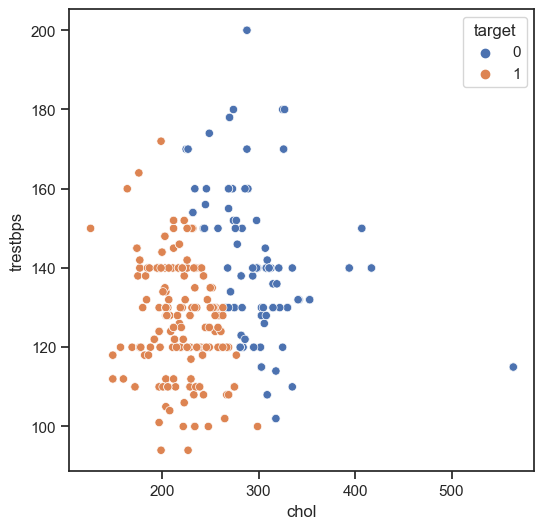

In [10]:
classified_dataset = data_test[predict_attributes]
classified_dataset["target"] = predict_survived


fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(ax=ax, x='chol', y='trestbps', data=classified_dataset, hue='target')

### Оценка модели классификации

В качестве метрики для оценки качества модели была выбрана матрица ошибок. По ней можно понять из каких изначальных значений были предсказаны новые значения и таким образом подсчитать количество верно предсказанных значений. 

2023-06-04 01:35:40.174 
  command:

    streamlit run C:\Users\Tanya\PycharmProjects\ml_rk2\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

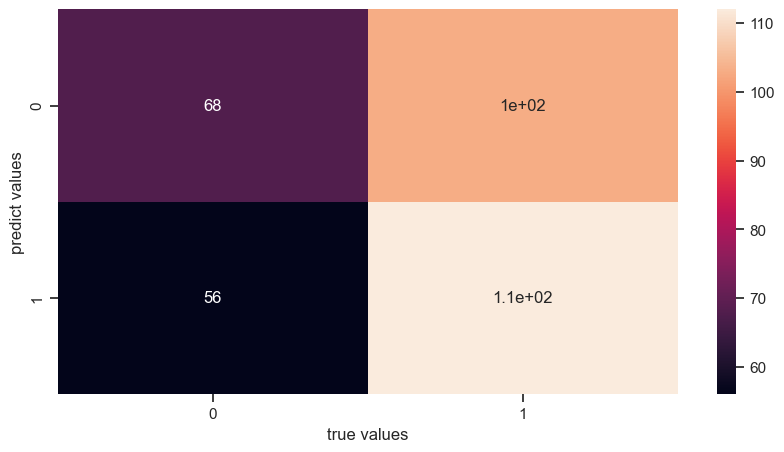

In [11]:
from sklearn.metrics import confusion_matrix
import streamlit as st

fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(data_test["target"], predict_survived.astype(np.int64))
sns.heatmap(cm, annot=True)
plt.xlabel('true values')
plt.ylabel('predict values')
st.pyplot(fig)

In [12]:
print('Процент верных предсказаний: ', (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]) * 100, '%')

Процент верных предсказаний:  53.09734513274337 %


Из данной оценки можно сделать вывод, что модели необходимо обработать больший набор данных для более точного результата.

### Регрессия. Градиентный бустинг.

In [3]:
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
data_train, data_test = train_test_split(dataset, test_size=0.33, random_state=42)

predict_attributes = ["chol", "trestbps"]
predict_result = ["oldpeak"]

X = data_train[predict_attributes]
y = data_train[predict_result].values.ravel()
clf = GradientBoostingRegressor(random_state=1).fit(X, y)
predict_survived = clf.predict(data_test[predict_attributes])
print(predict_survived)

[0.69971883 1.61386674 0.93790404 0.77068989 0.75601891 1.01125293
 0.67019348 1.20270294 0.70686607 2.07402047 0.78902762 2.15209346
 0.74527361 0.56141476 1.57083095 0.61143145 1.32379587 0.57932737
 0.72734845 1.05911102 0.64998151 0.80993768 1.19257105 0.7137869
 0.64998151 0.32329542 0.77957178 0.23964813 3.08416331 1.19689437
 1.61386674 0.7137869  1.03432235 1.61386674 1.59880178 0.44553297
 0.64998151 0.59213536 0.80363401 0.50529717 1.20270294 1.78252851
 0.86638672 1.19257105 1.25961641 2.11969774 1.57594062 0.61022917
 0.61217861 1.02098598 1.38048101 1.26403168 0.79582862 1.32243159
 0.77957178 0.80363401 0.62200073 0.81660058 0.95687416 1.20554984
 0.80993768 0.44553297 3.08416331 1.02098598 1.01125293 2.17870178
 0.13437184 0.75601891 2.11969774 0.95021126 0.79114242 3.08416331
 0.79319449 0.67119564 0.50504086 1.32379587 0.67019348 0.73101515
 0.68499173 0.95148874 0.86262797 1.18483958 2.46072682 2.50742207
 0.51793231 1.19689437 0.78902762 1.86884151 0.86262797 1.19689

C:\Users\Tanya\AppData\Local\Temp\ipykernel_1000\2607770480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classified_dataset[predict_result[0]] = predict_survived


<Axes: xlabel='chol', ylabel='trestbps'>

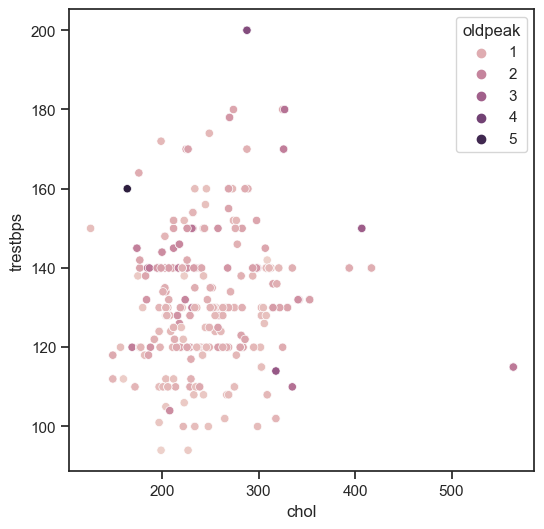

In [7]:
classified_dataset = data_test[predict_attributes]
classified_dataset[predict_result[0]] = predict_survived


fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(ax=ax, x=predict_attributes[0], y=predict_attributes[1], data=classified_dataset, hue=predict_result[0])

### Оценка модели регрессии

Для оценки регрессии была выбрана метрика MSE. Чем меньше показатель MSE, тем точнее предсказание.

In [25]:
from sklearn.metrics import mean_squared_error

In [27]:
print('Значение MSE:')
mean_squared_error(data_test["oldpeak"], predict_survived)

Значение MSE:


0.9177899257957146

На основе MSE можно построить график оценки истинных и предсказанных значений.

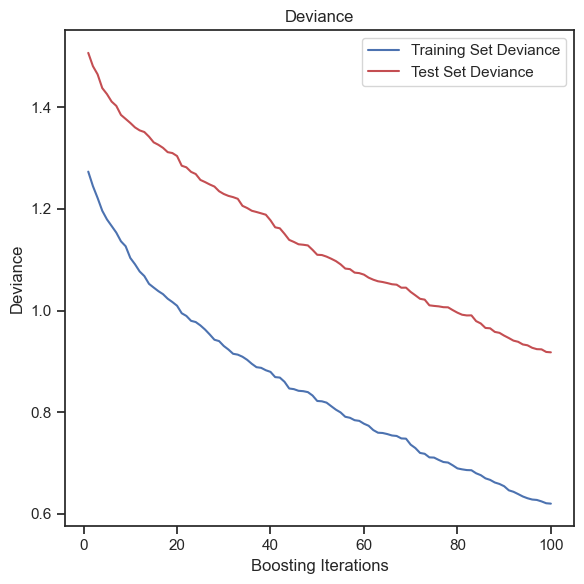

In [24]:
test_score = np.zeros((100,), dtype=np.float64) #100 - число деревьев по умолчанию в градиентном бустинге
for i, predict_survived in enumerate(clf.staged_predict(data_test[predict_attributes])):
    test_score[i] = mean_squared_error(data_test["oldpeak"], predict_survived)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(100) + 1,
    clf.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(100) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

Таким образом, можно сделать вывод, что модели необходимо большее число данных для лучшего предсказания.